<a href="https://colab.research.google.com/github/maryskal/mamography_uoc/blob/main/hyperparameter_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df_big = pd.read_csv("./hyperparameter_results_big.csv")
df = pd.read_csv("./hyperparameter_results_small.csv")
df = pd.concat([df, pd.read_csv("./hyperparameter_results.csv")])

In [ ]:
df.columns

Index(['Unnamed: 0', 'model_name', 'frozen_proportion', 'learning_rate',
       'val_auc', 'val_accuracy', 'val_loss', 'val_precision'],
      dtype='object')

In [ ]:
len(df)

80

In [ ]:
df[df.val_auc == max(df.val_auc)]

,Unnamed: 0,model_name,frozen_proportion,learning_rate,val_auc,val_accuracy,val_loss,val_precision
30,NaN,ViT,0.443658,0.000539,0.987045,0.910049,2.802011,0.983262


In [ ]:
df_vit = df[df.model_name == 'ViT']
df_cnn = df[df.model_name == 'CNN']

In [ ]:
df_cnn[df_cnn.val_auc == max(df_cnn.val_auc)]

,Unnamed: 0,model_name,frozen_proportion,learning_rate,val_auc,val_accuracy,val_loss,val_precision
14,NaN,CNN,0.025008,0.000631,0.978392,0.899505,1.173793,0.908784


<ipython-input-15-ee4db2ec1d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_name', y='val_auc', data=df, palette='muted')


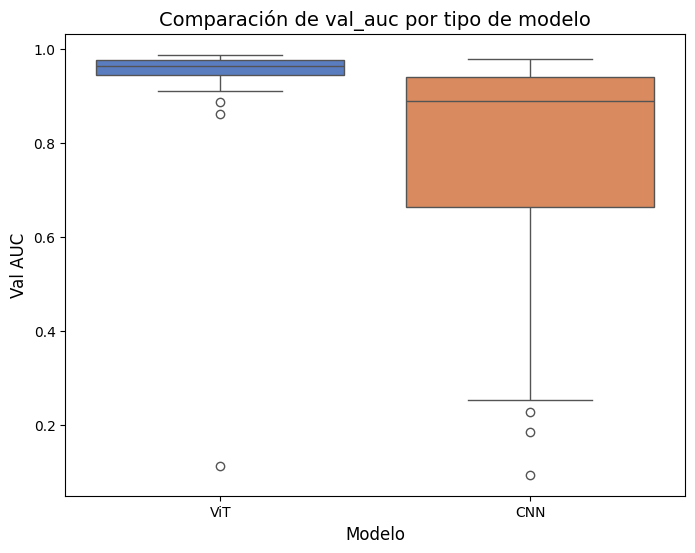

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='model_name', y='val_auc', data=df, palette='muted')

# Personalizar el gráfico
plt.title('Comparación de val_auc por tipo de modelo', fontsize=14)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Val AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

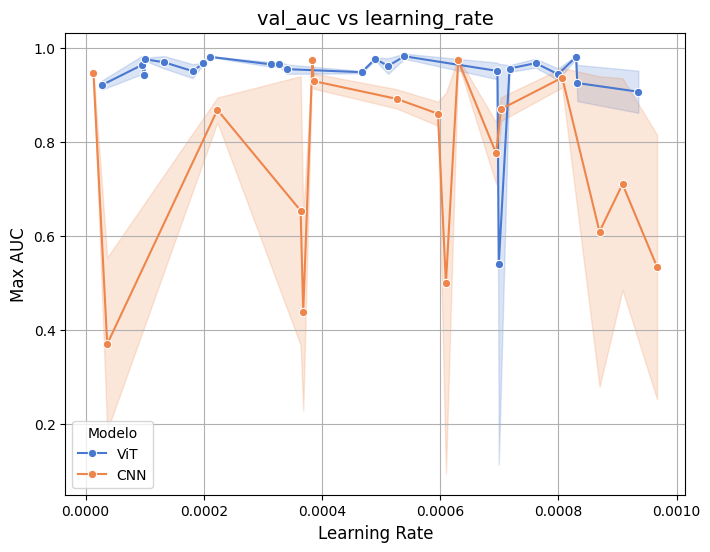

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='learning_rate', y='val_auc', hue='model_name', data=df, marker='o', palette='muted')
plt.title('val_auc vs learning_rate', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Max AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(title='Modelo', fontsize=10)
plt.show()

<ipython-input-17-09d57a096f0d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='learning_rate', y='val_auc', data=df, marker='o', palette='muted')


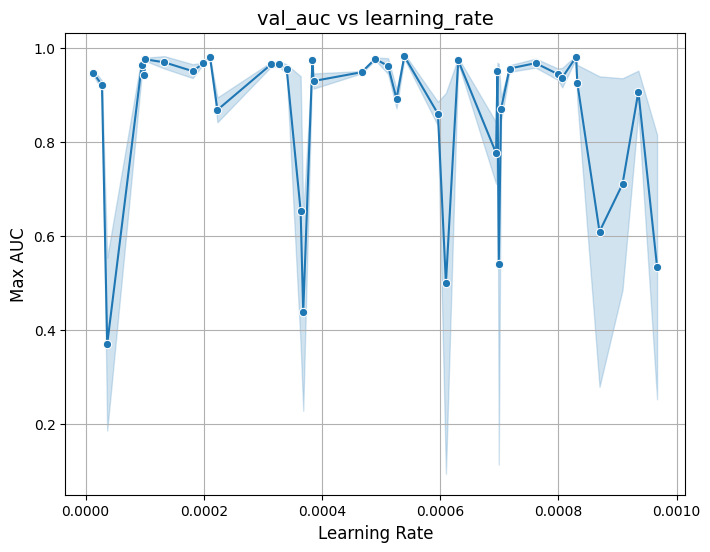

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='learning_rate', y='val_auc', data=df, marker='o', palette='muted')
plt.title('val_auc vs learning_rate', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Max AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

<Axes: xlabel='learning_rate', ylabel='val_auc'>

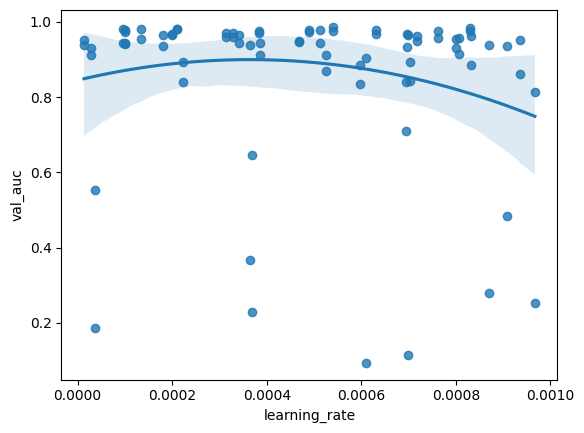

In [ ]:
sns.regplot(x='learning_rate', y='val_auc', data=df, order=2)

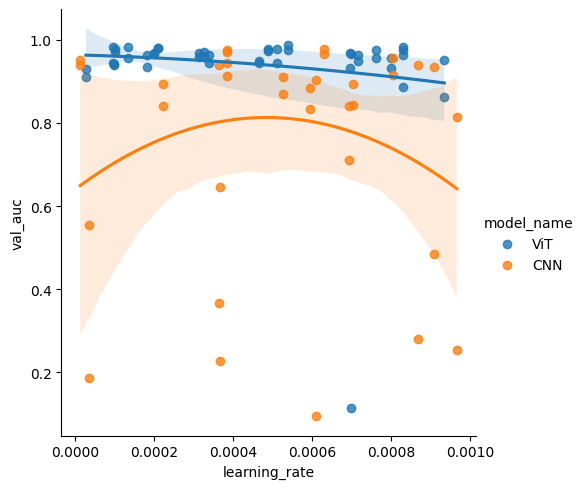

In [ ]:
sns.lmplot(
    x='learning_rate',
    y='val_auc',
    hue='model_name',
    data=df,
    order=2,
    markers='o'  # Un solo marcador para todos los modelos
)

<Axes: xlabel='frozen_proportion', ylabel='val_auc'>

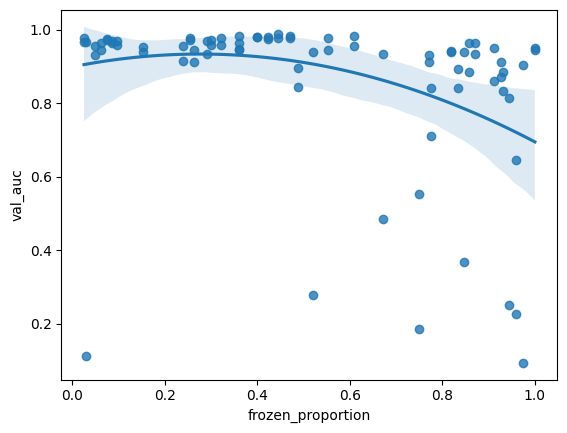

In [ ]:
sns.regplot(x='frozen_proportion', y='val_auc', data=df, order=2)

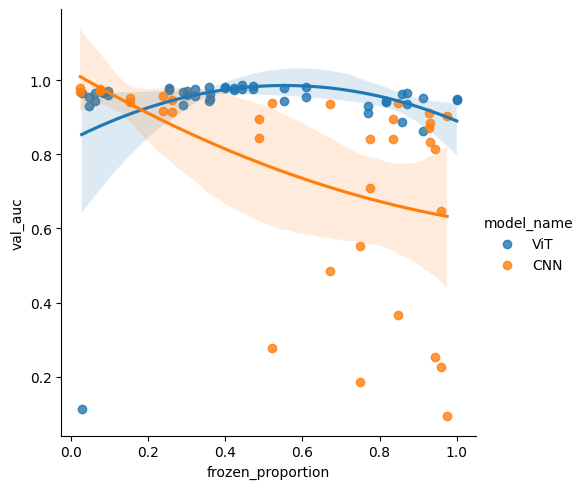

In [ ]:
sns.lmplot(
    x='frozen_proportion',
    y='val_auc',
    hue='model_name',
    data=df,
    order=2,
    markers='o'  # Un solo marcador para todos los modelos
)

In [ ]:
from scipy import stats

In [ ]:
grupo1 = df['val_auc'][df.model_name == 'ViT']
grupo2 = df['val_auc'][df.model_name == 'CNN']

In [ ]:
stat1, p_value1 = stats.shapiro(grupo1)
stat2, p_value2 = stats.shapiro(grupo2)

print(f"Prueba Shapiro-Wilk para Grupo 1: p-value = {p_value1}")
print(f"Prueba Shapiro-Wilk para Grupo 2: p-value = {p_value2}")

Prueba Shapiro-Wilk para Grupo 1: p-value = 9.079950088743134e-14
Prueba Shapiro-Wilk para Grupo 2: p-value = 3.3031557123076507e-06


In [ ]:
stat, p_value_levene = stats.levene(grupo1, grupo2)

print(f"Prueba de Levene: p-value = {p_value_levene}")

Prueba de Levene: p-value = 0.0006752897280893618


In [ ]:
print(f'{np.mean(df_vit.val_auc)} {np.quantile(df_vit.val_auc, [0.15,0.75])}')
print(f'{np.mean(df_cnn.val_auc)} {np.quantile(df_cnn.val_auc, [0.15,0.75])}')

0.9384172555545102 [0.9346536  0.97554857]
0.7547605112195015 [0.36307545 0.93914191]


In [ ]:
stat, p_value = stats.mannwhitneyu(grupo1, grupo2)

print(f"Prueba de Mann-Whitney U: p-value = {p_value}")

Prueba de Mann-Whitney U: p-value = 2.4282245522961736e-07


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Mean Squared Error: 0.04701989367248821
R2 Score: 0.01484140986812621


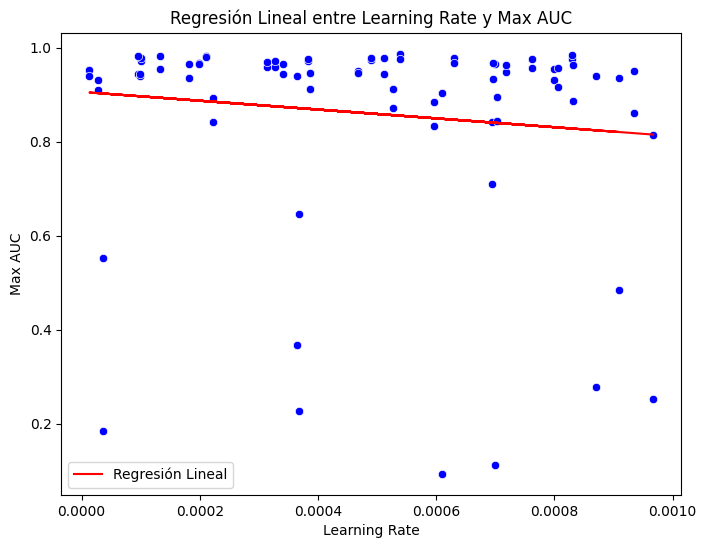

In [ ]:
model = LinearRegression()

# Reshape para asegurar que learning_rate tiene la forma correcta
X = np.array(df['learning_rate']).reshape(-1, 1)
y = np.array(df['val_auc'])

# Ajustar el modelo
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x='learning_rate', y='val_auc', data=df, color='blue')
plt.plot(df['learning_rate'], y_pred, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal entre Learning Rate y Max AUC')
plt.xlabel('Learning Rate')
plt.ylabel('Max AUC')
plt.legend()
plt.show()

In [ ]:
df.to_csv("./hyperparameter_tuning_results.csv")